In [1]:
import os

In [2]:
import pandas as pd

In [3]:
# Checking The Existance of the File
file_path =  r"C:\Users\adity\OneDrive\Pictures\Screenshots\new dataset walmart.csv"

if os.path.exists(file_path):
    print("File Exists!")
else:
    print("File Not Found!")


File Exists!


In [4]:
file_path = r"C:\Users\adity\OneDrive\Pictures\Screenshots\new dataset walmart.csv"

 
df = pd.read_csv(file_path)

df.head(11) 

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,2019-01-17,8091,216418,99.0375,111.8625,0,0,20
1,2,2019-01-17,8091,216419,99.0375,99.0375,0,0,28
2,3,2019-01-17,8091,216425,133.9500,133.9500,0,0,19
3,4,2019-01-17,8091,216233,133.9500,133.9500,0,0,44
4,5,2019-01-17,8091,217390,141.0750,141.0750,0,0,52
5,9,2019-01-17,8091,219009,227.2875,227.2875,0,0,18
6,10,2019-01-17,8091,219029,327.0375,327.0375,0,0,47
7,13,2019-01-17,8091,223245,210.9000,210.9000,0,0,50
8,14,2019-01-17,8091,223153,190.2375,234.4125,1,1,82
9,17,2019-01-17,8095,216418,99.0375,99.0375,0,0,99


In [5]:
# Split the column with n=2 to ensure three parts are created
df[['day', 'month', 'year']] = df['week'].str.split('-', n=2, expand=True)


In [6]:
df = df.drop('week',axis = 1)

In [7]:
df.head(11)

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,2019,01,17
1,2,8091,216419,99.0375,99.0375,0,0,28,2019,01,17
2,3,8091,216425,133.9500,133.9500,0,0,19,2019,01,17
3,4,8091,216233,133.9500,133.9500,0,0,44,2019,01,17
4,5,8091,217390,141.0750,141.0750,0,0,52,2019,01,17
5,9,8091,219009,227.2875,227.2875,0,0,18,2019,01,17
6,10,8091,219029,327.0375,327.0375,0,0,47,2019,01,17
7,13,8091,223245,210.9000,210.9000,0,0,50,2019,01,17
8,14,8091,223153,190.2375,234.4125,1,1,82,2019,01,17
9,17,8095,216418,99.0375,99.0375,0,0,99,2019,01,17


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X,y = df.drop('units_sold',axis = 1),df['units_sold']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [9]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [10]:
model.score(X_test,y_test)

0.77737387822074

In [11]:
from sklearn.metrics import root_mean_squared_error

y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_pred,y_test)

rmse

27.02710477281894

In [12]:
df.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.626751,219.425927,0.095611,0.133200,51.674206
std,61386.037861,615.591445,85547.306447,103.308516,110.961712,0.294058,0.339792,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


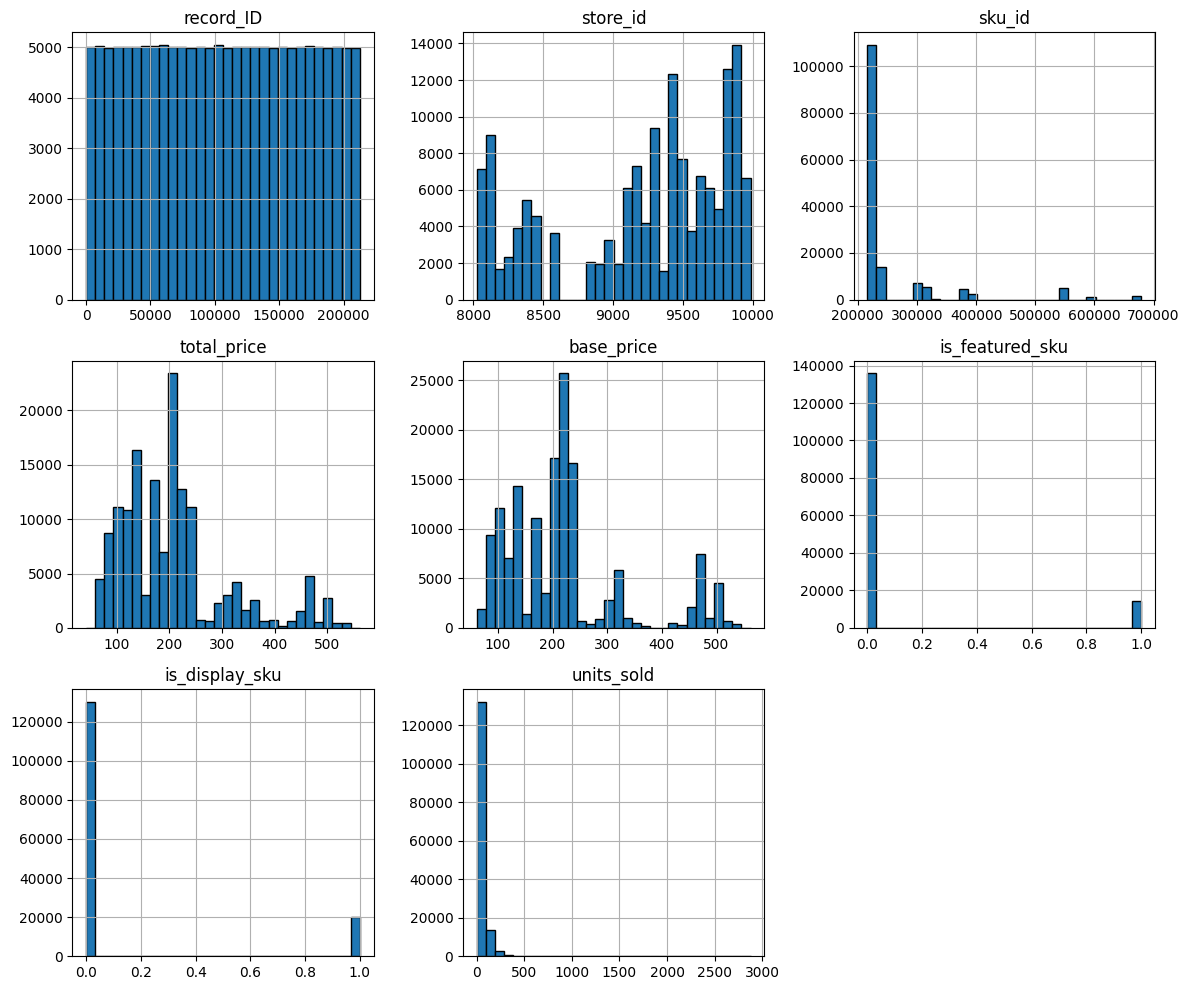

In [13]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 10), bins=30, edgecolor='black')

plt.tight_layout()

plt.show()


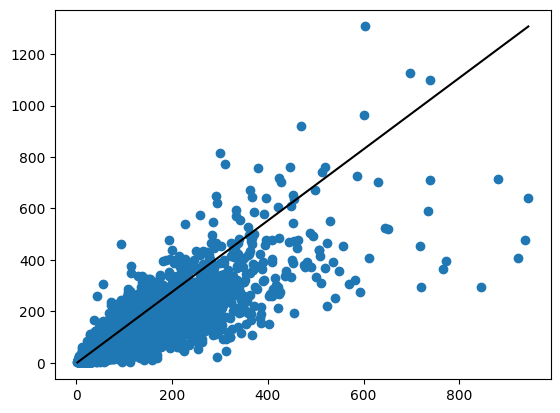

In [14]:
import numpy as np

plt.scatter(y_pred,y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(),y_test.max()),color ="black")

In [15]:
df = df.drop('record_ID' , axis = 1)

In [16]:
len(df.store_id.unique())

76

In [17]:
len(df.sku_id.unique())

28

In [18]:
 df = df[df.units_sold < df.units_sold.quantile(0.99)]

<Axes: >

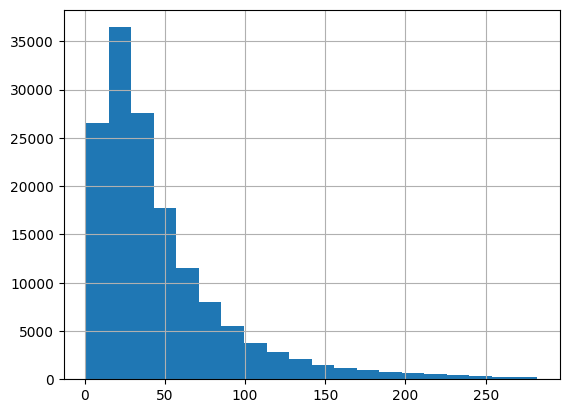

In [19]:
df.units_sold.hist(bins = 20)

In [20]:
df.join(pd.get_dummies(df.store_id, prefix='store')).drop('store_id',axis = 1)
df.join(pd.get_dummies(df.sku_id, prefix='item')).drop('sku_id',axis = 1)

,store_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year,item_216233,...,item_320485,item_327492,item_378934,item_398721,item_545621,item_546789,item_547934,item_600934,item_673209,item_679023
0,8091,99.0375,111.8625,0,0,20,2019,01,17,False,...,False,False,False,False,False,False,False,False,False,False
1,8091,99.0375,99.0375,0,0,28,2019,01,17,False,...,False,False,False,False,False,False,False,False,False,False
2,8091,133.9500,133.9500,0,0,19,2019,01,17,False,...,False,False,False,False,False,False,False,False,False,False
3,8091,133.9500,133.9500,0,0,44,2019,01,17,True,...,False,False,False,False,False,False,False,False,False,False
4,8091,141.0750,141.0750,0,0,52,2019,01,17,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,9984,235.8375,235.8375,0,0,38,2021,07,09,False,...,False,False,False,False,False,False,False,False,False,False
150146,9984,235.8375,235.8375,0,0,30,2021,07,09,False,...,False,False,False,False,False,False,False,False,False,False
150147,9984,357.6750,483.7875,1,1,31,2021,07,09,False,...,False,False,False,False,False,False,False,False,False,False
150148,9984,141.7875,191.6625,0,1,12,2021,07,09,False,...,False,False,False,False,False,False,True,False,False,False


In [21]:
model = RandomForestRegressor(n_jobs=-1)
X , y = df.drop('units_sold',axis = 1),df['units_sold']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [22]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [23]:
model.score(X_train, y_train)

0.9724675861722143

In [24]:
y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_pred,y_test)

rmse

18.71481481936408

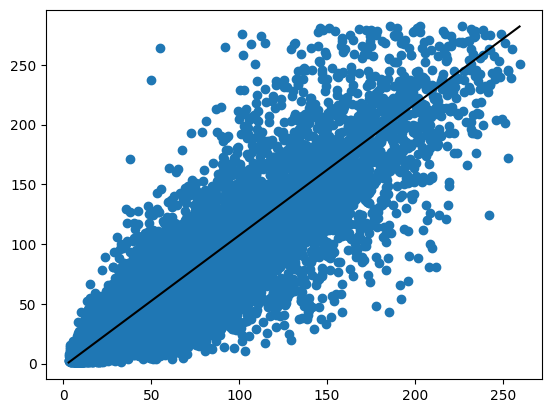

In [25]:
plt.scatter(y_pred,y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(),y_test.max()),color ="black")

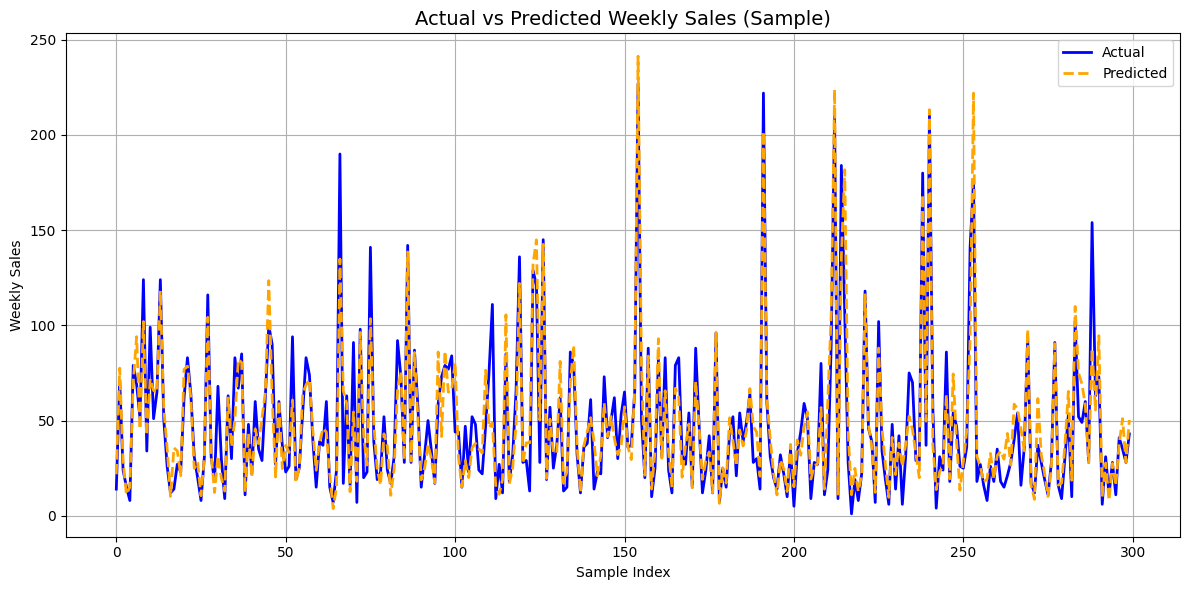

In [26]:
import matplotlib.pyplot as plt
import numpy as np

sample_size = 300
actual_sample = y_test.values[:sample_size]
pred_sample = y_pred[:sample_size]

plt.figure(figsize=(12, 6))
plt.plot(actual_sample, label='Actual', color='blue', linewidth=2)
plt.plot(pred_sample, label='Predicted', color='orange', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Weekly Sales (Sample)', fontsize=14)
plt.xlabel('Sample Index')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


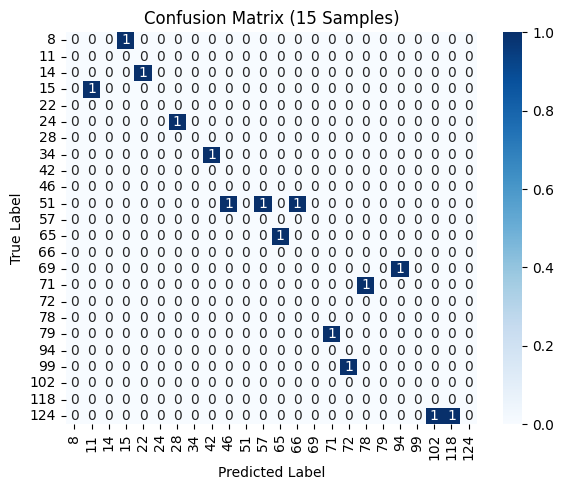

              precision    recall  f1-score   support

           8       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         0
          34       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         0
          46       0.00      0.00      0.00         0
          51       0.00      0.00      0.00         3
          57       0.00      0.00      0.00         0
          65       1.00      1.00      1.00         1
          66       0.00      0.00      0.00         0
          69       0.00      0.00      0.00         1
          71       0.00      0.00      0.00         1
          72       0.00      0.00      0.00         0
          78       0.00    

In [27]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Sample 15 predictions and actual values
X_small = X_test[:15]
y_small = y_test[:15]
y_pred_small = model.predict(X_small)

# If predictions are probabilities or continuous values, round or take argmax
if len(y_pred_small.shape) > 1 and y_pred_small.shape[1] > 1:
    y_pred_small = y_pred_small.argmax(axis=1)
else:
    y_pred_small = np.round(y_pred_small).astype(int)

# Ensure y_small is also integer class labels
if len(y_small.shape) > 1 and y_small.shape[1] > 1:
    y_small = y_small.argmax(axis=1)
else:
    y_small = np.round(y_small).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_small, y_pred_small)
labels = sorted(np.unique(np.concatenate([y_small, y_pred_small])))

# Plot with seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (15 Samples)")
plt.tight_layout()
plt.show()

# Suppress classification warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UndefinedMetricWarning)
    print(classification_report(y_small, y_pred_small, zero_division=0))


In [28]:
import joblib
joblib.dump(model, 'sales_forecast_model.pkl')

['sales_forecast_model.pkl']